Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of 
clusters formed and draw inferences.

Data Description:

    Murder - Muder rates in different places of United States

    Assualt - Assualt rate in different places of United States

    UrbanPop - Urban population in different places of United States

    Rape - Rape rate in different places of United States


In [37]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

### Hierarchical Clustering

In [2]:
CrimeData = pd.read_csv("D:/1.0 Studies/DataScience_Excelr/Assignment9_Clustering/crime_data.csv")
CrimeData.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
#Normalize data

def norm_func(i):
    r = ( i - i.min()) / ( i.max() - i.min())
    return(r)

n_CrimeData = norm_func(CrimeData.iloc[:,1:])

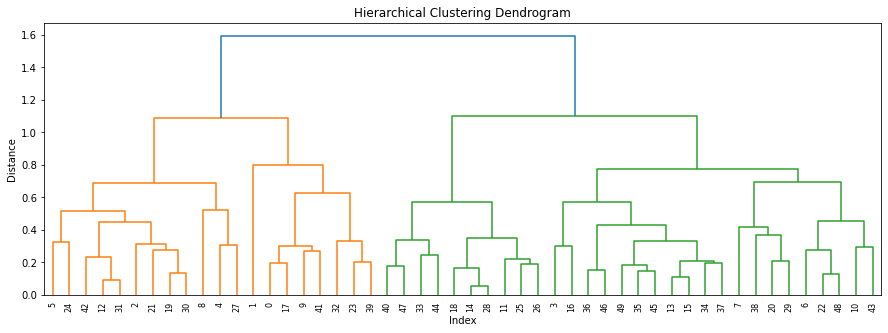

In [4]:
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(n_CrimeData, method='complete',metric='euclidean'))
plt.show()

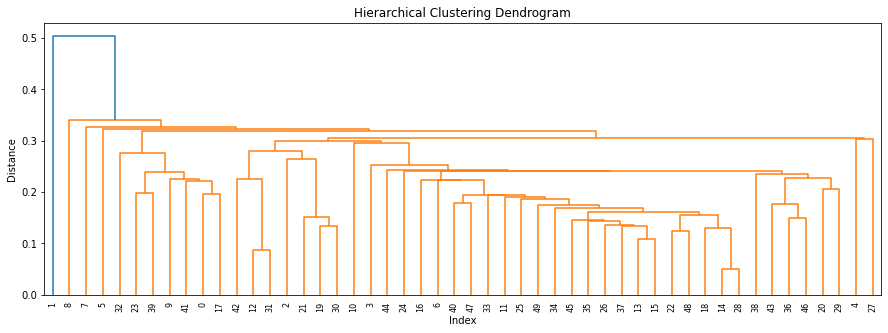

In [5]:
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(n_CrimeData, method='single',metric='euclidean'))
plt.show()

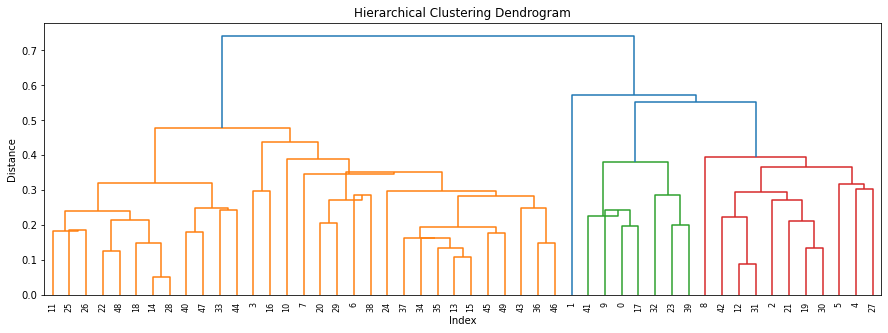

In [6]:
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(n_CrimeData, method='centroid',metric='euclidean'))
plt.show()

In [7]:
#Note : Methods are 'single','complete','average','weighted','centroid'

In [8]:
#Apply Hierarchical Clustering
hc= AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean")
y_hc = hc.fit_predict(n_CrimeData)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head(10)

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [36]:
#Apply Hierarchical Clustering
hc= AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(n_CrimeData)
cluster_label= pd.Series(hc.labels_)
CrimeData["Cluster"] = cluster_label
CrimeData.sort_values(by=['Cluster'], inplace=True)
CrimeData.head(10)

,Rape,Cluster,City,Murder,Assault,UrbanPop
1,44.5,0,Alaska,10.0,263,48
17,22.2,0,Louisiana,15.4,249,66
23,17.1,0,Mississippi,16.1,259,44
32,16.1,0,North Carolina,13.0,337,45
39,22.5,0,South Carolina,14.4,279,48
9,25.8,0,Georgia,17.4,211,60
41,26.9,0,Tennessee,13.2,188,59
0,21.2,0,Alabama,13.2,236,58
35,20.0,1,Oklahoma,6.6,151,68
15,18.0,1,Kansas,6.0,115,66


In [33]:
CrimeData.to_csv("Crime_data_Hierarchical.csv",encoding="utf-8")